In [139]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math


In [140]:
def compute_cycling_score2(path_weather_impact):
    upper_temperature = 40.7
    lower_temperature = -27.4
    upper_wind_speed = 40.5
    ideal_temperature = 20.0
    temperature_impact = abs(path_weather_impact['temperature'] - ideal_temperature)
    wind_speed_impact = path_weather_impact['wind_speed']

    # Extract the wind direction percentages
    headwind_percentage = path_weather_impact['headwind_percentage']
    tailwind_percentage = path_weather_impact['tailwind_percentage']
    crosswind_percentage = path_weather_impact['crosswind_percentage']

    # Consider the wind direction percentages
    wind_direction_impact = headwind_percentage - tailwind_percentage + crosswind_percentage

    score = (temperature_impact * wind_speed_impact) + (wind_speed_impact ** 2) + wind_direction_impact

    max_temperature_impact = abs(upper_temperature - ideal_temperature)
    max_wind_speed_impact = upper_wind_speed
    max_wind_direction_impact = 1  # assuming wind direction percentages range from 0 to 1
    max_score = (max_temperature_impact * max_wind_speed_impact) + (max_wind_speed_impact ** 2) + max_wind_direction_impact
    min_score = 0
    normalized_score = (score - min_score) / (max_score - min_score)
    return normalized_score

In [141]:
# Create a range of temperature and wind speed values
temperatures = np.linspace(-10, 40, 100)  # temperatures from -10 to 40 degrees Celsius
wind_speeds = np.linspace(0, 30, 100)     # wind speeds from 0 to 20 m/s

# Create a 2D grid of temperature and wind speed values
temp_grid, wind_speed_grid = np.meshgrid(temperatures, wind_speeds)

# Compute the cycling score for each combination of temperature and wind speed
scores = np.zeros_like(temp_grid)
for i in range(temp_grid.shape[0]):
    for j in range(temp_grid.shape[1]):
        path_weather_impact = {
            'temperature': temp_grid[i, j],
            'wind_speed': wind_speed_grid[i, j],
            'tailwind_percentage': 20,  # keep wind impact constant
            'headwind_percentage': 10,
            'crosswind_percentage': 10,
        }
        scores[i, j] = compute_cycling_score2(path_weather_impact)




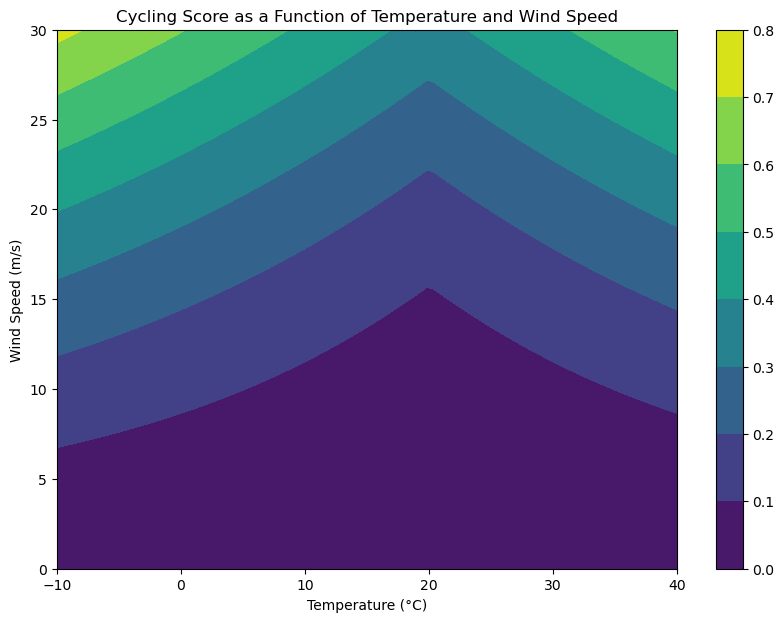

In [142]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 7))
contour_plot = plt.contourf(temp_grid, wind_speed_grid, scores, cmap='viridis')

# Add a colorbar to the plot
plt.colorbar(contour_plot)

# Label the axes and the plot
plt.title('Cycling Score as a Function of Temperature and Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')

# Display the plot
plt.show()

In [143]:
def find_headwind_percentage(relative_wind_angle):
    if((relative_wind_angle > 270) or (relative_wind_angle > 0 and relative_wind_angle < 90)):
        theta_rad = math.radians(relative_wind_angle)
        return int((1 + math.cos(theta_rad)) / 2 * 100)
    return 0

def find_crosswind_percentage(relative_wind_angle):
    theta_rad = math.radians(relative_wind_angle)
    return int((1 - math.cos(2 * theta_rad)) / 2 * 100)

def find_tailwind_percentage(relative_wind_angle):
    if((relative_wind_angle > 90) and (relative_wind_angle < 270)):
        theta_rad = math.radians(relative_wind_angle)
        return int((1 - math.cos(theta_rad)) / 2 * 100)
    return 0

In [144]:
# Generate angles
angles = np.arange(0, 361, 1)

# Compute percentages
headwind_percentages = [find_headwind_percentage(angle) for angle in angles]
crosswind_percentages = [find_crosswind_percentage(angle) for angle in angles]
tailwind_percentages = [find_tailwind_percentage(angle) for angle in angles]

# Create a DataFrame
df = pd.DataFrame({
    'angles': angles,
    'headwind': headwind_percentages,
    'crosswind': crosswind_percentages,
    'tailwind': tailwind_percentages
})


fig = go.Figure()
fig.add_trace(go.Scatterpolar(
        r = df['headwind'],
        theta = df['angles'],
        mode = 'lines',
        name = 'headwind',
        line_color = 'burlywood'
    ))
fig.add_trace(go.Scatterpolar(
        r = df['crosswind'],
        theta = df['angles'],
        mode = 'lines',
        name = 'crosswind',
        line_color = 'powderblue'
    ))
fig.add_trace(go.Scatterpolar(
        r = df['tailwind'],
        theta = df['angles'],
        mode = 'lines',
        name = 'tailwind',
        line_color = 'lightcoral'
        
    ))


fig.update_layout(
    title = 'Wind Impact score',
    showlegend = True,
    template = 'plotly_dark',


)
fig.update_traces(fill='toself')
## 0 is north so change the graph to start from north
fig.update_layout(polar_angularaxis_rotation=90)


fig.show()